# Regression


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 딥러닝을 위한 함수들
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from tensorflow.keras.optimizers import Adam # 옵티마이저 설정을 위해서

* 학습곡선 그래프

### (2) 데이터로딩

In [156]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

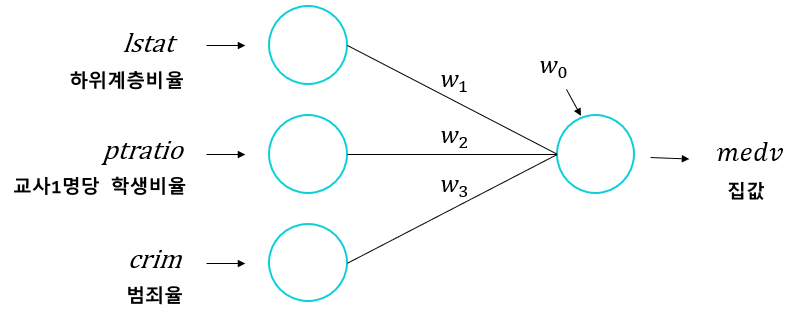

### (1) 데이터 분할1 : x, y 나누기

In [3]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

In [4]:
x.isna().sum()

lstat      0
ptratio    0
crim       0
dtype: int64

### (2) 변수정리

### (3) NA 조치

### (4) 가변수화

### (5) 데이터분할2

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

### (6) Scaling

In [6]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.Linear Regression vs. DL

### (1) Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

# 모델 선언
model1 = LinearRegression()

# 학습
model1.fit(x_train, y_train)

# 회귀계수(coefficient, weight, parameter 등 다양한 이름으로 불립니다.)
print('가중치:',model1.coef_,'편향:', model1.intercept_)
print('pred = ',model1.coef_[0],'* lstat +',model1.coef_[1],'* ptratio +',model1.coef_[2],'* crim +',model1.intercept_)

가중치: [-30.65674704 -11.08171045  -2.05183246] 편향: 38.74172973444514
pred =  -30.656747037082177 * lstat + -11.081710445859013 * ptratio + -2.051832462648711 * crim + 38.74172973444514


In [8]:
pred1 = model1.predict(x_val)

### (2) DL

* 모델 설계

In [9]:
# 분석단위 구조
nfeatures = x.shape[1]
nfeatures

3

In [10]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential()

# Layer 정의
layer = Dense(1 , input_shape= (nfeatures, ))

# 모델에 추가
model2.add(layer)

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Param #  4개의 의미   가중치 3개, 편향 1개 도합 4개의 파라미터 생성되었다는 뜻!

* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [12]:
# lr : 손실 함수의 최솟값을 찾기 위해 적용하는 학습율
# optimizer를 통해 오차를 줄이는 방향으로 가중치를 경신한다. 
model2.compile(optimizer =Adam(lr = 0.13) , loss  ='mse'  )

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


* 학습

In [13]:
# epochs=100 : 100번 반복 학습하여 가중치 경신. loss를 줄여가게 됨. 초기값은 랜덤하게 부여.
# batch size는 조정 웬만하면 하지 마라. 할 필요 없다. 
history = model2.fit(x_train,y_train,epochs=100,validation_split=0.2).history

Epoch 1/100
11/11 [==============================] - 2s 56ms/step - loss: 606.9619 - val_loss: 513.2198
Epoch 2/100
11/11 [==============================] - 0s 18ms/step - loss: 497.4617 - val_loss: 417.1723
Epoch 3/100
11/11 [==============================] - 0s 17ms/step - loss: 406.8742 - val_loss: 339.0754
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 334.9269 - val_loss: 279.7629
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 281.6602 - val_loss: 237.2175
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 243.0464 - val_loss: 205.3294
Epoch 7/100
11/11 [==============================] - 0s 16ms/step - loss: 213.2314 - val_loss: 182.2401
Epoch 8/100
11/11 [==============================] - 0s 15ms/step - loss: 191.5956 - val_loss: 165.8795
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 176.7046 - val_loss: 154.0680
Epoch 10/100
11/11 [==============================] - 0s 15ms/ste

* 학습결과 그래프

In [14]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

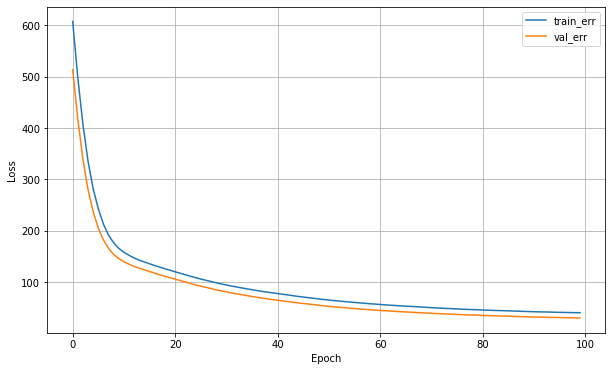

In [15]:
dl_history_plot(history)

In [16]:
pred2 = model2.predict(x_val)

4/4 [==============================] - 0s 5ms/step


### (3) 모델 비교

#### 1) 가중치 비교

* 선형회귀 : 회귀계수

In [17]:
model1.coef_, model1.intercept_

(array([-30.65674704, -11.08171045,  -2.05183246]), 38.74172973444514)

* 딥러닝 : 가중치
    * model.layers : 모델 안의 레이어들
    * model.layers[0].get_weights() : 첫번째 레이어의 가중치 가져오기

In [18]:
model2.layers[0].get_weights()

[array([[-27.4777   ],
        [ -2.7592885],
        [-11.500915 ]], dtype=float32),
 array([32.651604], dtype=float32)]

#### 2) 성능비교

In [19]:
# 선형회귀
print(f'RMSE : {mean_squared_error(y_val,pred1,squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val,pred1)}')
print(f'r2  : {r2_score(y_val,pred1)}')

RMSE : 5.417347601611182
MAE  : 3.964130627709487
r2  : 0.589515519070497


In [20]:
# DL
print(f'RMSE : {mean_squared_error(y_val,pred2,squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val,pred2)}')
print(f'r2  : {r2_score(y_val,pred2)}')

RMSE : 5.333590166486234
MAE  : 3.9604194641113284
r2  : 0.602110370663776


## 4.딥러닝 : 전체 데이터
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [47]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 2022)

* 스케일링

In [48]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [49]:
# 분석단위 구조
nfeatures = x.shape[1]

In [50]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model3 = Sequential()

# Layer 정의
layer = Dense(1, input_shape=(nfeatures,))

# 모델에 추가
model3.add(layer)

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


* compile

In [51]:
model3.compile(optimizer=Adam(lr = 0.13),loss='mse')

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


* 학습

In [52]:
# batch size는 2의 n승으로 자주 표기 
history = model3.fit(x_train,y_train,epochs=1000,batch_size=64,validation_split=0.2).history

Epoch 1/1000
6/6 [==============================] - 1s 36ms/step - loss: 577.8035 - val_loss: 431.6923
Epoch 2/1000
6/6 [==============================] - 0s 10ms/step - loss: 408.0254 - val_loss: 296.4740
Epoch 3/1000
6/6 [==============================] - 0s 9ms/step - loss: 286.2398 - val_loss: 206.3787
Epoch 4/1000
6/6 [==============================] - 0s 9ms/step - loss: 205.4532 - val_loss: 154.7151
Epoch 5/1000
6/6 [==============================] - 0s 9ms/step - loss: 161.4923 - val_loss: 130.3577
Epoch 6/1000
6/6 [==============================] - 0s 10ms/step - loss: 141.4634 - val_loss: 119.7391
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 130.6431 - val_loss: 113.0270
Epoch 8/1000
6/6 [==============================] - 0s 11ms/step - loss: 122.6050 - val_loss: 107.0095
Epoch 9/1000
6/6 [==============================] - 0s 10ms/step - loss: 115.4453 - val_loss: 100.9608
Epoch 10/1000
6/6 [==============================] - 0s 8ms/step - loss: 108.

* 학습결과 그래프

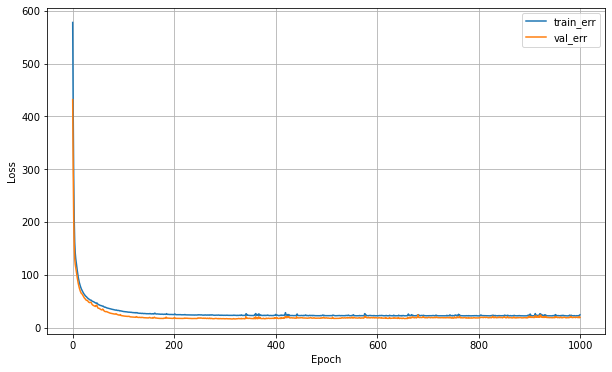

In [53]:
dl_history_plot(history)

* 예측 및 평가

In [54]:
pred = model3.predict(x_val)

4/4 [==============================] - 0s 2ms/step


In [57]:
print(mean_absolute_error(y_val,pred))
print(mean_absolute_percentage_error(y_val,pred))
print(r2_score(y_val,pred))

4.004853140139112
0.2431752314140323
0.6204643195256688


In [ ]:
# 값이 평균 +- 4정도 차이가 난다
# == 모델 3가 집값을 예측했는데, 평균 4000달러 정도 오차가 발생하였다. 

## 5.DL2 : hidden layer를 추가해 봅시다.
* 이제 레이어를 추가해 보겠습니다.
* learning_rate도 조정해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [77]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2
                                                  , random_state = 2022)

* 스케일링

In [78]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [79]:
# 분석단위 구조
nfeatures = x_train.shape[1] #num of columns
nfeatures

13

In [80]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer1 = Dense(4 , input_shape = (nfeatures,), activation = 'relu')
layer2 = Dense(1, )

# 모델에 추가
model.add(layer1)
model.add(layer2)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


* compile

In [81]:
# optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
# lr과 learning_rate은 같지만, learning_rate 사용을 권장

model.compile(optimizer = Adam(lr = 0.05)  , loss='mse')

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


* 학습

In [82]:
epochs = 100
batch_size = 32 # default 값 32.

history = model.fit(x_train, y_train
                     , epochs = epochs, batch_size = batch_size
                     , validation_split=0.2).history

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 578.8981 - val_loss: 416.7709
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 314.2602 - val_loss: 141.7183
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 151.6002 - val_loss: 145.0890
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 127.5485 - val_loss: 88.9293
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 92.9163 - val_loss: 72.9884
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 78.6726 - val_loss: 67.7646
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 66.0956 - val_loss: 56.2161
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 59.7046 - val_loss: 51.1525
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 57.1665 - val_loss: 47.9612
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 53.3699 -

* 학습결과 그래프

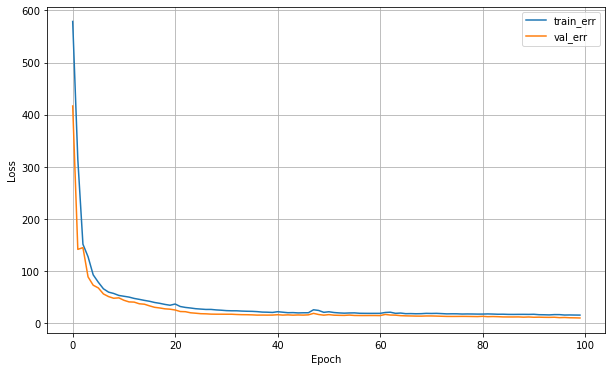

In [83]:
dl_history_plot(history)

* 예측 및 평가

In [84]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')
print(f'R2  : {r2_score(y_val, pred)}')

4/4 [==============================] - 0s 5ms/step
RMSE : 5.0161960571465185
MAE  : 3.4505413934296247
MAPE  : 0.18928574044533178
R2  : 0.6480569917238299


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | 9 | node |    

In [132]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer1 = Dense(8, input_shape=(nfeatures,),activation = 'relu')
layer2 = Dense(1,)
# 모델에 추가
model.add(layer1)
model.add(layer2)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


* 컴파일 + 학습

In [133]:
model.compile(optimizer=Adam(lr = 0.05),loss='mse')

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [134]:
epochs = 100
batch_size = 32 # default 값 32.

history = model.fit(x_train, y_train
                     , epochs = epochs, batch_size = batch_size
                     , validation_split=0.2).history

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 513.9924 - val_loss: 270.1469
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 183.6069 - val_loss: 148.6570
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 127.6052 - val_loss: 85.3535
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 89.5596 - val_loss: 68.7724
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 71.4310 - val_loss: 66.4389
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 63.2914 - val_loss: 51.8334
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 55.8553 - val_loss: 48.1933
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 52.7297 - val_loss: 44.3343
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 48.6099 - val_loss: 41.3034
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 45.4364 - v

* 학습곡선

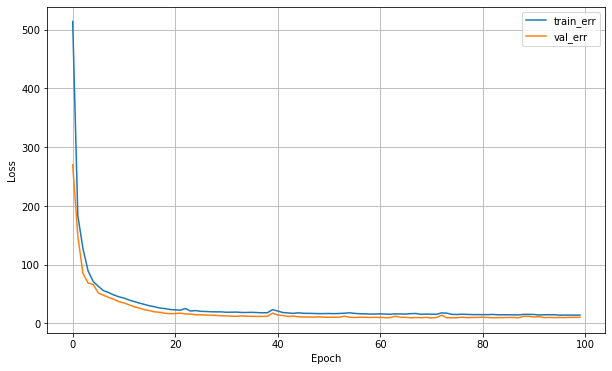

In [135]:
dl_history_plot(history)

* 검증

In [136]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')
print(f'R2  : {r2_score(y_val, pred)}')

4/4 [==============================] - 0s 2ms/step
RMSE : 5.013826667048975
MAE  : 3.3975146574132573
MAPE  : 0.1906524447715321
R2  : 0.6483893923421531


### (4)실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 4) | 36 | node, activation = 'relu' |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [137]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer1 = Dense(8, input_shape=(nfeatures,), activation='relu')
layer2 = Dense(4,activation='relu')
layer3 = Dense(1,)
# 모델에 추가
model.add(layer1)
model.add(layer2)
model.add(layer3)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


* 컴파일 + 학습

In [143]:
model.compile(optimizer=Adam(lr = 0.1),loss='mse')

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [144]:
epochs = 100
batch_size = 32 # default 값 32.

history = model.fit(x_train, y_train
                     , epochs = epochs, batch_size = batch_size
                     , validation_split=0.2).history

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 27.0664 - val_loss: 21.4114
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 18.0079 - val_loss: 20.3484
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 14.0257 - val_loss: 11.5089
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 12.1916 - val_loss: 12.1875
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 13.5702 - val_loss: 13.5875
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 14.1056 - val_loss: 12.4087
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 13.6165 - val_loss: 14.5481
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 13.3397 - val_loss: 11.4905
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 19.0352 - val_loss: 15.6066
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 18.2316 - val_lo

* 학습곡선

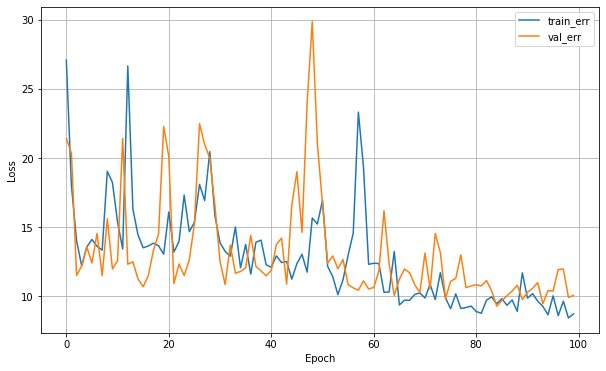

In [145]:
dl_history_plot(history)

* 검증

In [146]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')
print(f'R2  : {r2_score(y_val, pred)}')

4/4 [==============================] - 0s 2ms/step
RMSE : 4.985824026549301
MAE  : 2.978922062294156
MAPE  : 0.168277465381056
R2  : 0.6523059736909311


### (5)실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.
* 제일 마지막 노드는 activation을 지정하지 않습니다.

In [157]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer1 = Dense(16, input_shape=(nfeatures,),activation = 'relu')
layer2 = Dense(8,activation = 'relu')
layer3 = Dense(4,activation = 'relu')
layer4 = Dense(1,)

# 모델에 추가
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


* 컴파일 + 학습

In [158]:
model.compile(optimizer=Adam(lr=0.1),loss='mse')

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [159]:
epochs = 100
batch_size = 32 # default 값 32.

history = model.fit(x_train, y_train
                     , epochs = epochs, batch_size = batch_size
                     , validation_split=0.2).history

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 229.4888 - val_loss: 120.9667
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 101.8000 - val_loss: 128.8454
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 108.4123 - val_loss: 47.9035
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 63.4953 - val_loss: 54.9750
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 46.2050 - val_loss: 31.9927
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 34.2678 - val_loss: 24.8268
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 27.7736 - val_loss: 19.7697
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 23.3705 - val_loss: 16.1650
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 25.2557 - val_loss: 18.3632
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 20.9391 - v

* 학습곡선

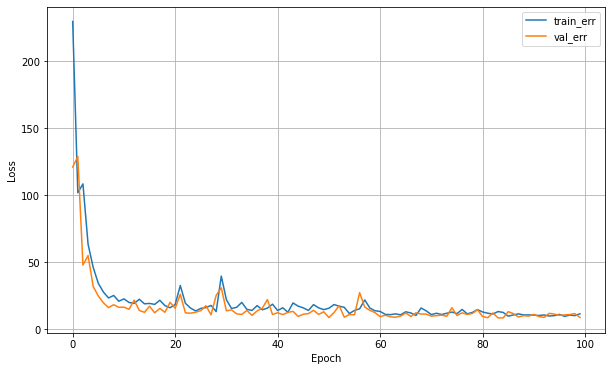

In [160]:
dl_history_plot(history)

* 검증

In [161]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')
print(f'R2  : {r2_score(y_val, pred)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 4.805683985926014
MAE  : 2.923459284913306
MAPE  : 0.16667757718405243
R2  : 0.6769767705292357


In [155]:
# 레이어의 수 , 레이어 내부 노드 수 , epochs, adam내부 learning rate 등을 조절할 수 있다.

layer1 = Dense(32, input_shape=(nfeatures,),activation = 'relu')
layer2 = Dense(8,activation = 'relu')
layer3 = Dense(4,activation = 'relu')
layer4 = Dense(1,)

이런식으로 한번에 확 노드가 줄어들게 설계하니 예측성능이 떨어졌음. 